# Climate Anxiety in Youth and Perception of Government
## Question/Hypothesis: 
**Response Variable:** Q1 - I am worried that climate change threatens people and the planet.

**Predictors:** language, country, region, age, sex, Q2-Q8

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [1]:
df = pd.read_spss('Climate Anxiety-3.SAV')
df.head()

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,0.955127
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915752
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,NaN,NaN,West India,NaN,NaN,NaN,NaN,NaN,NaN,1.183360


## Data Exploration

In [1]:
df.columns, len(df.columns)

(Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
        'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
        'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
        'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
        'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
        'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
        'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
        'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
        'regionBrazil', 'regionFrance', 'weight'],
       dtype='object'),
 62)

In [1]:
df.dtypes

Respondent_Serial     float64
language             category
country              category
D1                    float64
D2                   category
                       ...   
regionFinland        category
regionPortugal       category
regionBrazil         category
regionFrance         category
weight                float64
Length: 62, dtype: object

In [1]:
df['Q1'].value_counts()

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

In [1]:
df['Q1'].value_counts(normalize=True)

Q1
very           0.327142
extremely      0.274665
moderately     0.246447
a little       0.103735
not worried    0.048011
Name: proportion, dtype: float64

In [1]:
# Count nan or 'Prefer not to say' values in the Q1 column
df['Q1'].isna().sum(), df['Q1'].str.contains('Prefer not to say').sum()

(148, 0)

In [1]:
df[df['Q1'].isna()]

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
68,114.0,English,Australia,21.0,woman,Australia: Tasmania,NaN,no,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739153
162,232.0,English,United Kingdom,21.0,woman,United Kingdom: North,NaN,no,yes,no,...,NaN,North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957871
209,290.0,English,Australia,21.0,woman,Australia: New South Wales,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771648
213,296.0,English,India,23.0,man,India: North India,NaN,no,no,no,...,NaN,NaN,North India,NaN,NaN,NaN,NaN,NaN,NaN,0.814742
230,321.0,English,Australia,21.0,man,Australia: Victoria,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,14903.0,English,Australia,25.0,man,Australia: Western Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145472
9853,15041.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,no,no,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9862,15057.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,yes,yes,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9867,15067.0,English,Nigeria,23.0,man,Nigeria: South South,NaN,yes,no,yes,...,NaN,NaN,NaN,South South,NaN,NaN,NaN,NaN,NaN,0.348822


In [1]:
df['AgeGender'].unique(), len(df['AgeGender'])

(['Men 21-25', 'Women 21-25', 'Women 16-20', 'Men 16-20']
 Categories (4, object): ['Men 16-20', 'Men 21-25', 'Women 16-20', 'Women 21-25'],
 10000)

In [1]:
# Count the number of men and women in the dataset
df['AgeGender'].value_counts()

AgeGender
Women 21-25    3153
Men 21-25      2900
Men 16-20      1994
Women 16-20    1953
Name: count, dtype: int64

## Data Cleaning

#### Replace columns with more descriptive names
The original convention used to describe the columns is not very descriptive. We will replace the column names with more descriptive names.

The new convention will be the Question number (Q1, Q2, Q3, etc.) followed by a descriptive word from the poll associated with that question/subquestion.

For example, Q2 is "Does climate change make you feel any of the following?" with sad being one of the options, and the responses being yes, no, and prefer not to say. The new column name will be Q2_sad and will contain the values yes, not, or nan.

In [1]:
columns = ['Repondent_Serial', 'language', 'country', 'age', 'sex', 'country:region', 
           'Q1', 
           'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
           'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed', 'Q2_despair',
           'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 
           'Q3', 
           'Q4_hesitant', 'Q4_doomed','Q4_frightening', 'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed',
           'Q5', 
           'Q6', 
           'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying',
           'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected',
           'yyyymmdd','AgeGender', 
           'regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance', 'weight']

In [1]:
df.columns = columns
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'regionAustralia', 'regionUS',
        'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines',
        'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance',
        'weight'],
       dty

In [1]:
# Drop all of the region columns
# Make a new region column that splits the country:region column by ':'
df['region'] = df['country:region'].str.split(':').str[1]
df = df.drop(columns=['regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance'])
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'weight', 'region'],
       dtype='object'),
 53)

##### Note: Drop all rows with missing response variable values

In [1]:
df = df.dropna(subset=['Q1'])

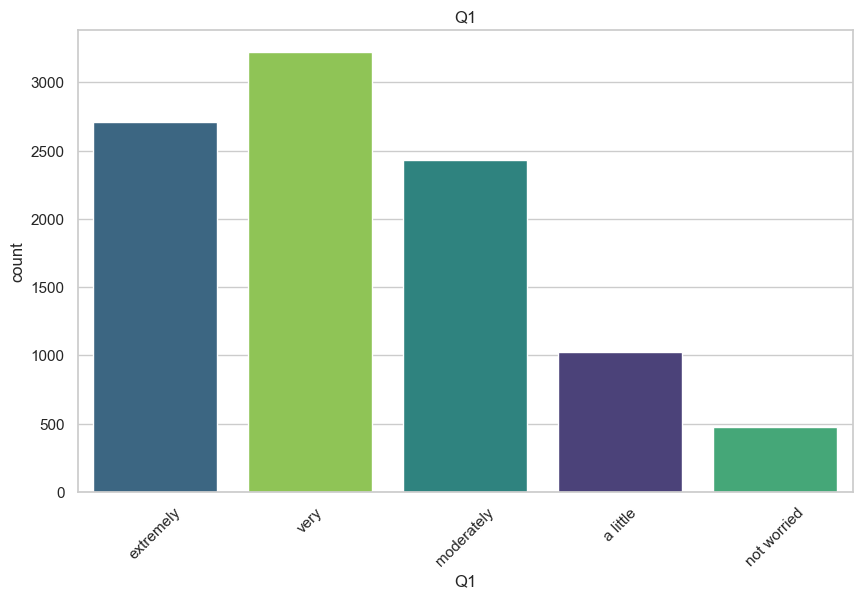

In [1]:
order = ['extremely', 'very', 'moderately', 'a little', 'not worried']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
# Sort by the value counts of the Q1 column
# sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=df['Q1'].value_counts().sort_values(ascending=False).index)
sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=order)
plt.xticks(rotation=45)
plt.title('Q1')
plt.show()

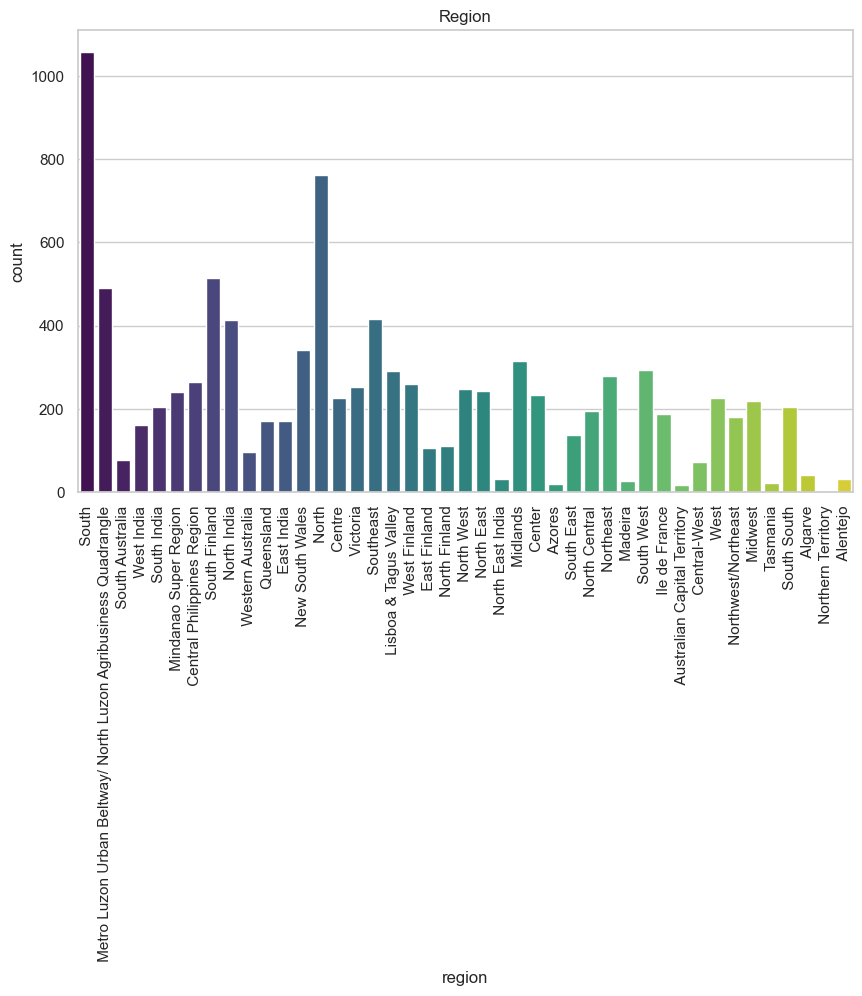

In [1]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Region')
plt.show()

In [1]:
# Find all rows with no null values
df[df.notnull().any(axis=1)]

,Repondent_Serial,language,country,age,sex,country:region,Q1,Q2_sad,Q2_helpless,Q2_anxious,...,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,yyyymmdd,AgeGender,weight,region
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,not at all,extremely,not at all,moderately,NaN,not at all,20210518.0,Men 21-25,0.955127,South
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,moderately,moderately,moderately,moderately,moderately,moderately,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,not at all,moderately,not at all,moderately,moderately,not at all,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,not at all,not at all,not at all,not at all,not at all,not at all,20210518.0,Women 16-20,0.915752,South Australia
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,extremely,very,extremely,very,extremely,extremely,20210518.0,Women 16-20,1.183360,West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15413.0,English,Australia,21.0,woman,Australia: Tasmania,extremely,yes,yes,yes,...,a little,extremely,a little,extremely,a little,not at all,20210607.0,Women 21-25,0.739153,Tasmania
9996,15415.0,English,Australia,25.0,woman,Australia: New South Wales,very,yes,yes,yes,...,a little,moderately,not at all,a little,not at all,a little,20210607.0,Women 21-25,0.771648,New South Wales
9997,15416.0,English,Australia,19.0,woman,Australia: New South Wales,extremely,yes,yes,yes,...,not at all,not at all,not at all,not at all,not at all,not at all,20210607.0,Women 16-20,0.869418,New South Wales
9998,15417.0,English,Australia,21.0,woman,Australia: Western Australia,very,yes,yes,yes,...,moderately,moderately,a little,very,moderately,a little,20210607.0,Women 21-25,0.821953,Western Australia


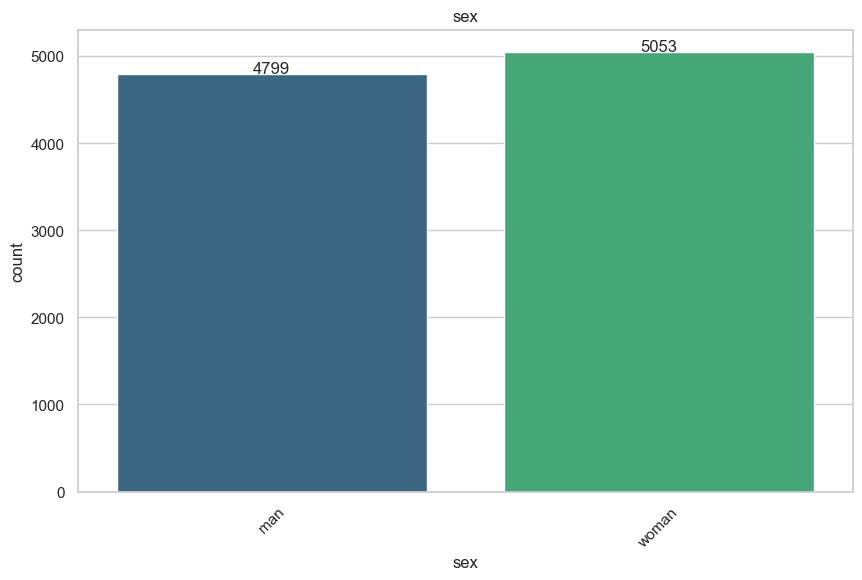

In [1]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'sex' column to a manageable number
top_sex = df['sex'].value_counts().nlargest(10).index
df_limited = df[df['sex'].isin(top_sex)]

sns.countplot(x='sex', data=df_limited, hue='sex', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('sex')

for i, sex in enumerate(df_limited['sex'].unique()):
    sex_count = df_limited['sex'].value_counts()[sex]
    plt.text(i, sex_count, f'{sex_count}', ha='center')

plt.show()

##### Note: Show most populus regions in the dataset

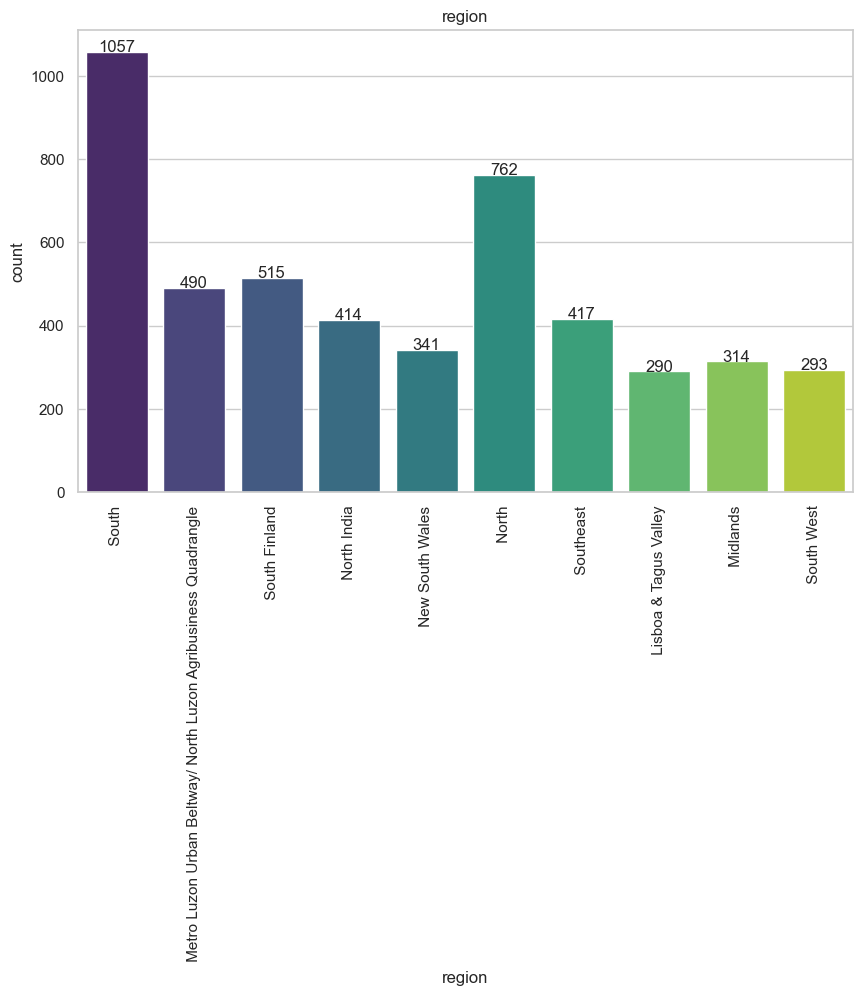

In [1]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'region' column to a manageable number
top_region = df['region'].value_counts().nlargest(10).index
df_limited = df[df['region'].isin(top_region)]

sns.countplot(x='region', data=df_limited, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('region')

for i, region in enumerate(df_limited['region'].unique()):
    region_count = df_limited['region'].value_counts()[region]
    plt.text(i, region_count, f'{region_count}', ha='center')

plt.show()

In [33]:
# drop unused variables 
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight']) # not the same as the X used in data analysis

for column in X.columns:
    summary = X[column].describe()

    print(f'{column}') 
    print(summary)

age
count    9852.000000
mean       21.241677
std         2.550188
min        16.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        25.000000
Name: age, dtype: float64
sex
count      9852
unique        2
top       woman
freq       5053
Name: sex, dtype: object
Q1
count     9852
unique       5
top       very
freq      3223
Name: Q1, dtype: object
Q2_sad
count     9735
unique       2
top        yes
freq      6661
Name: Q2_sad, dtype: object
Q2_helpless
count     9711
unique       2
top        yes
freq      5073
Name: Q2_helpless, dtype: object
Q2_anxious
count     9720
unique       2
top        yes
freq      6179
Name: Q2_anxious, dtype: object
Q2_afraid
count     9740
unique       2
top        yes
freq      6744
Name: Q2_afraid, dtype: object
Q2_optimistic
count     9636
unique       2
top         no
freq      6596
Name: Q2_optimistic, dtype: object
Q2_angry
count     9707
unique       2
top        yes
freq      5704
Name: Q2_angry, dtype: object
Q2_guilty


In [21]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

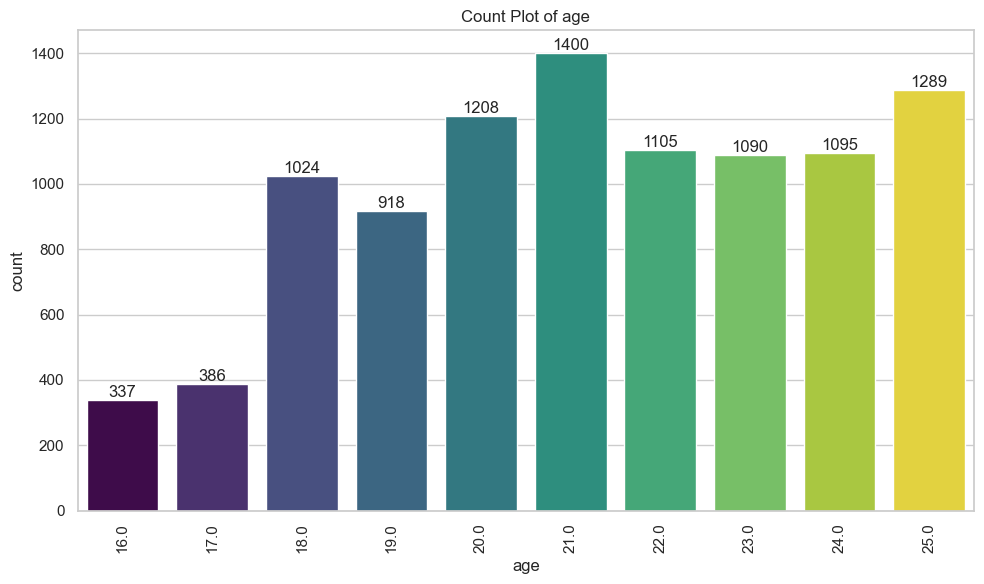

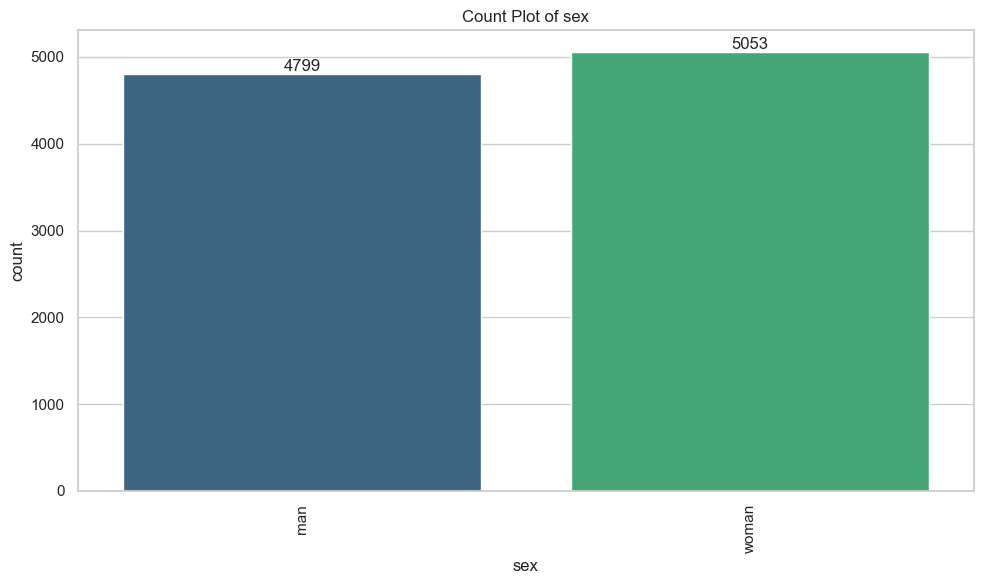

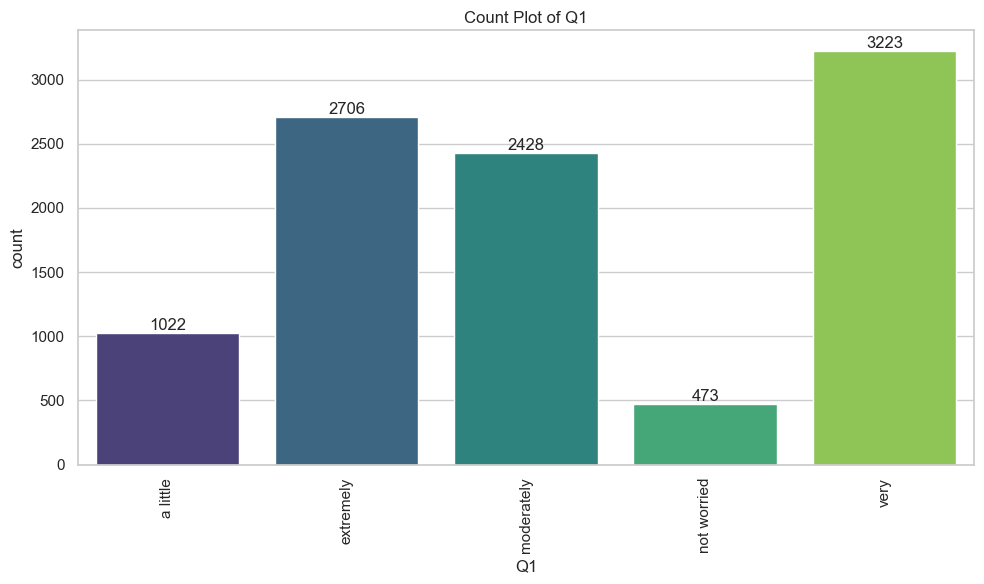

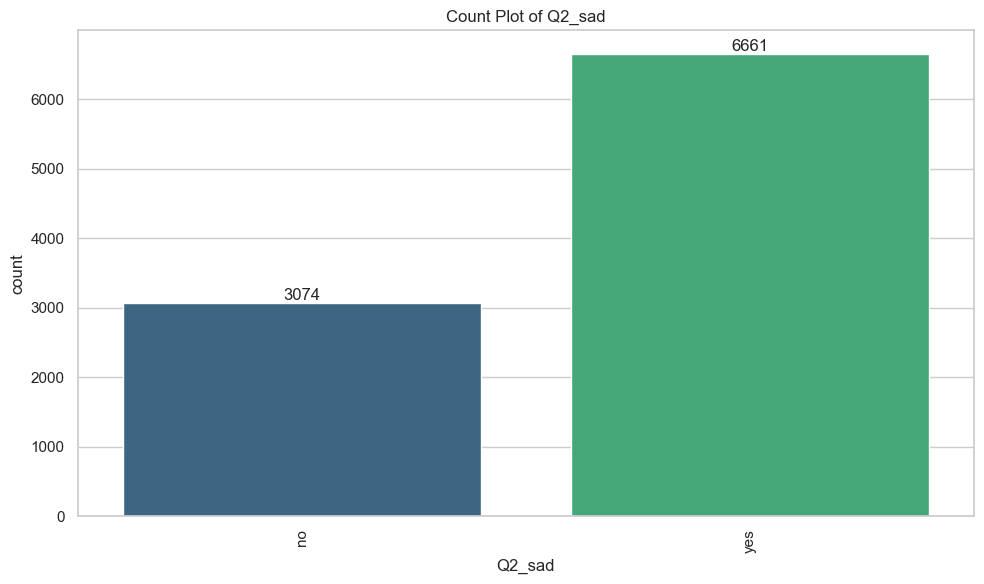

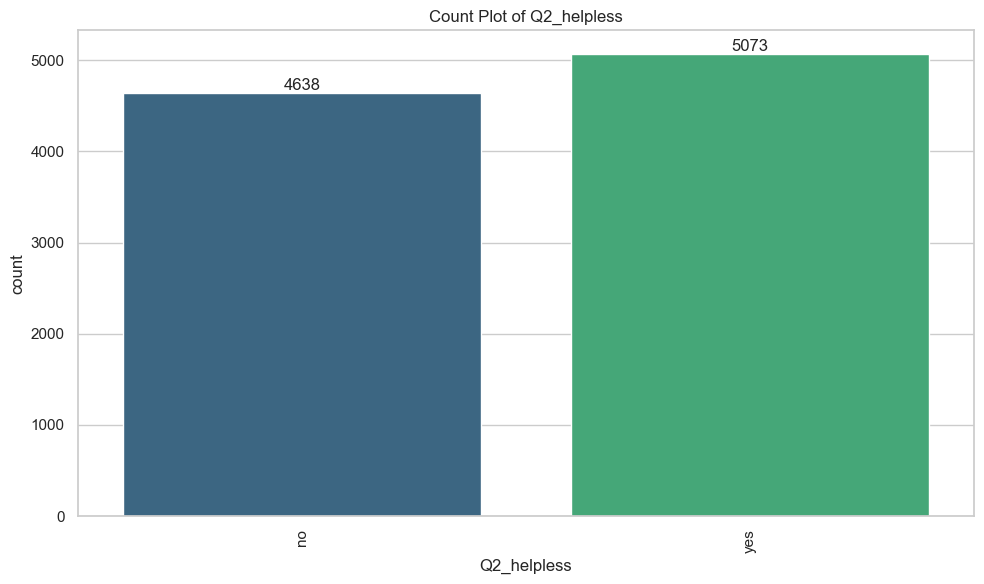

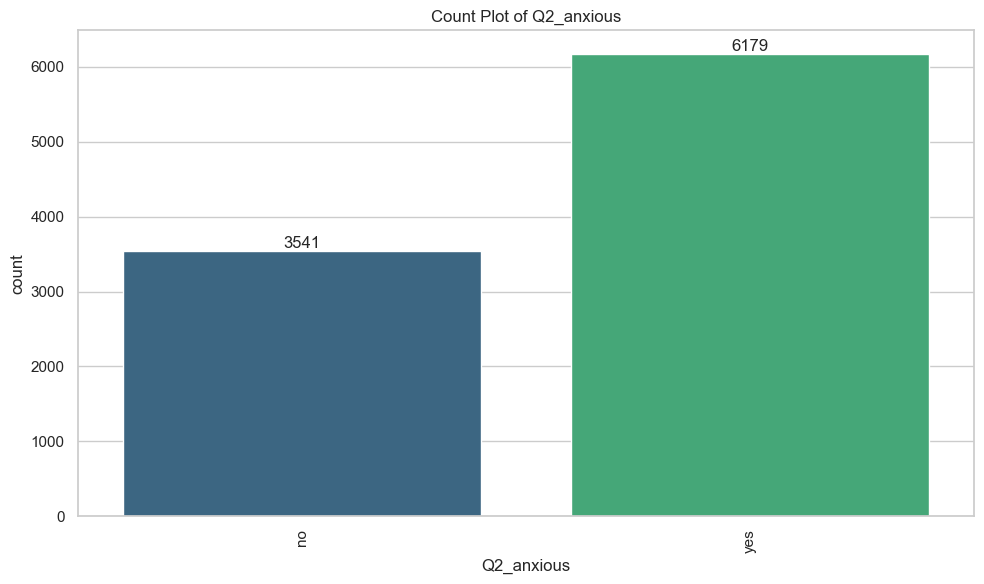

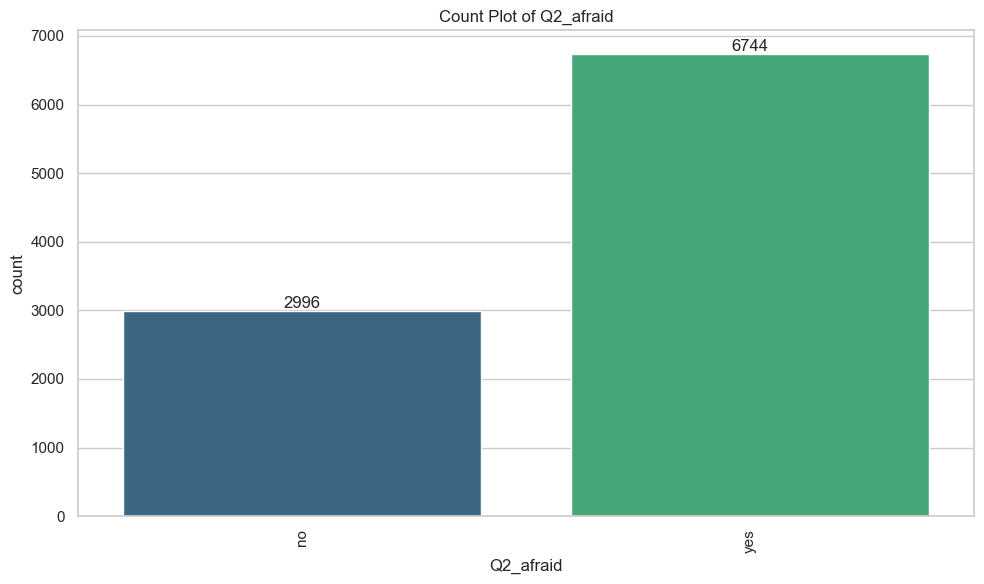

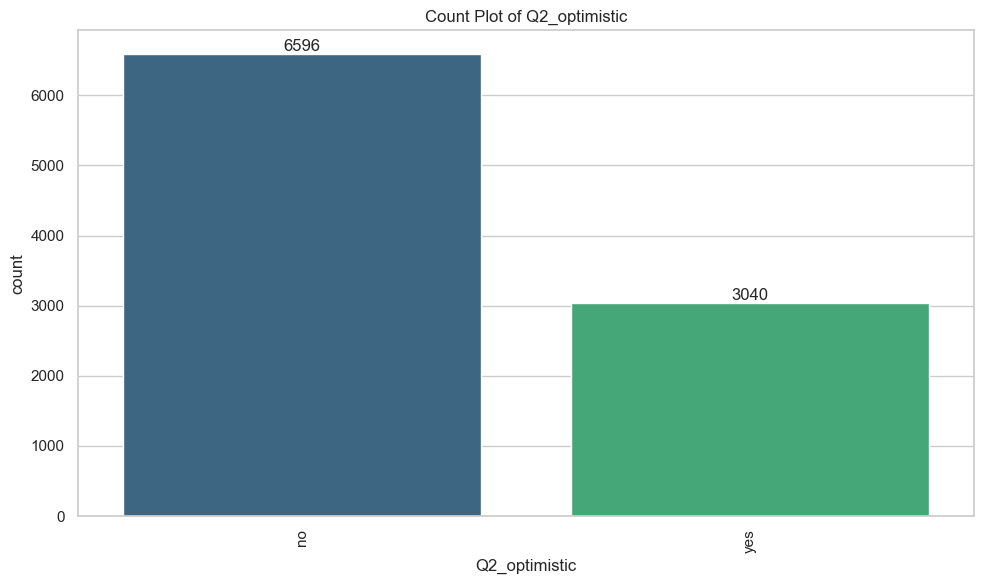

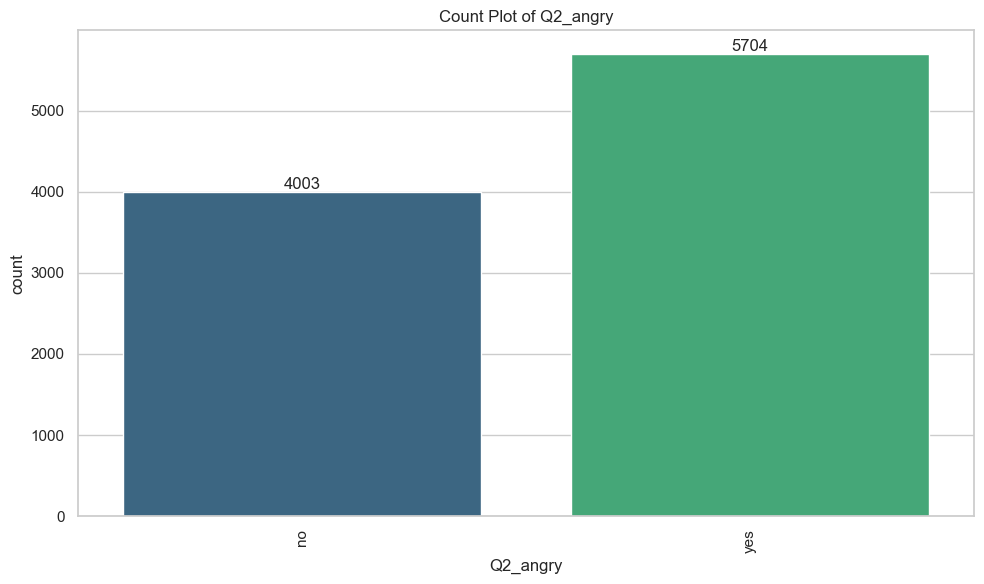

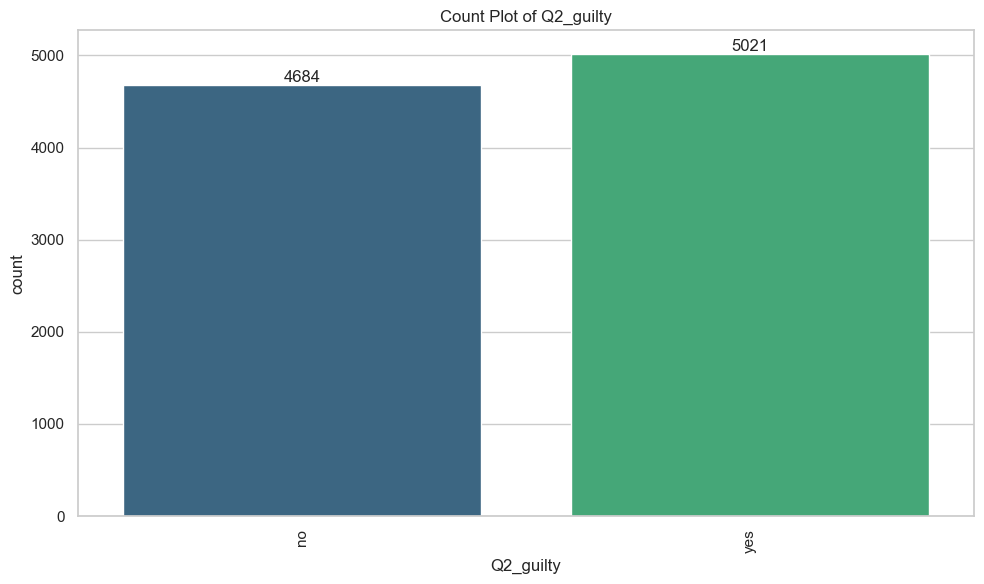

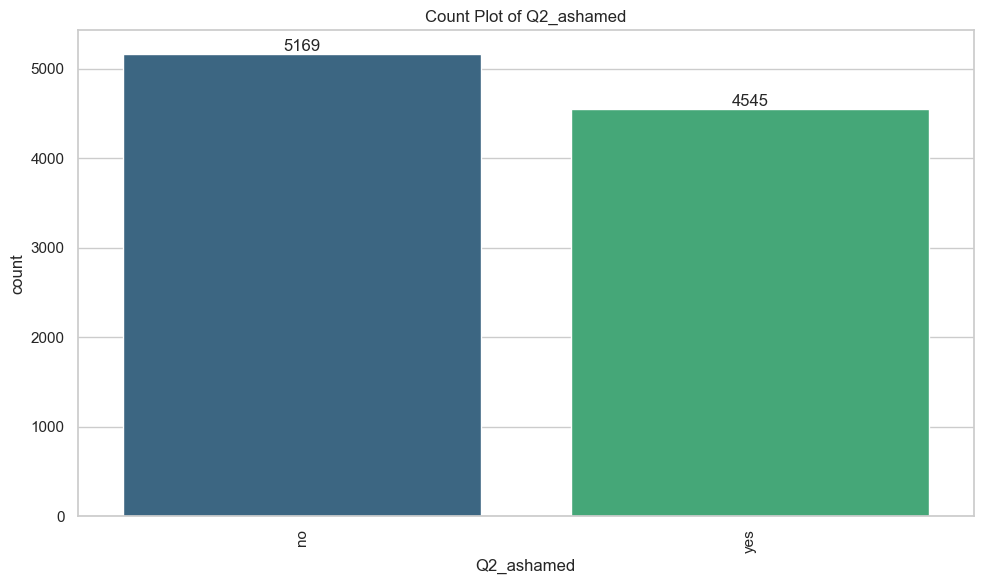

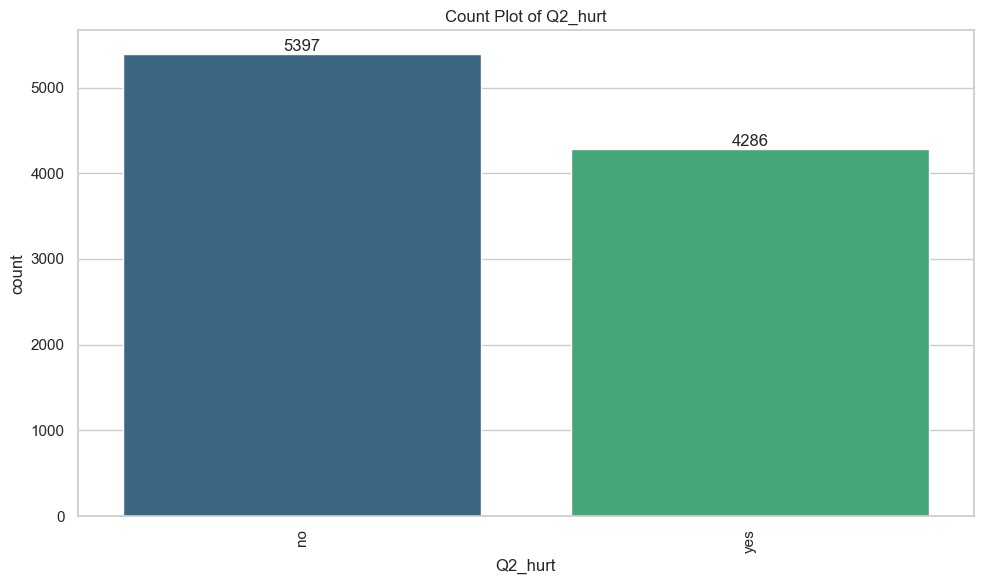

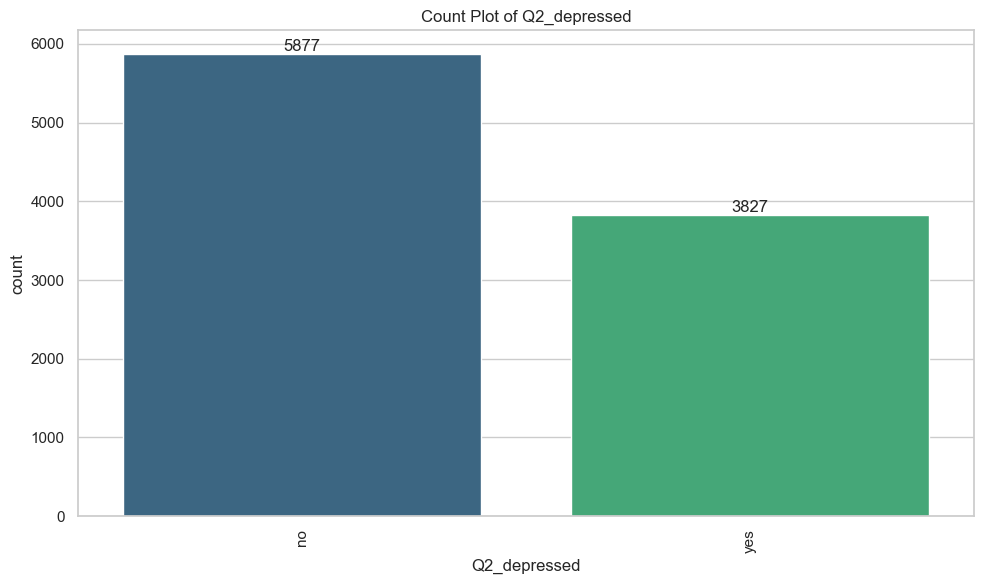

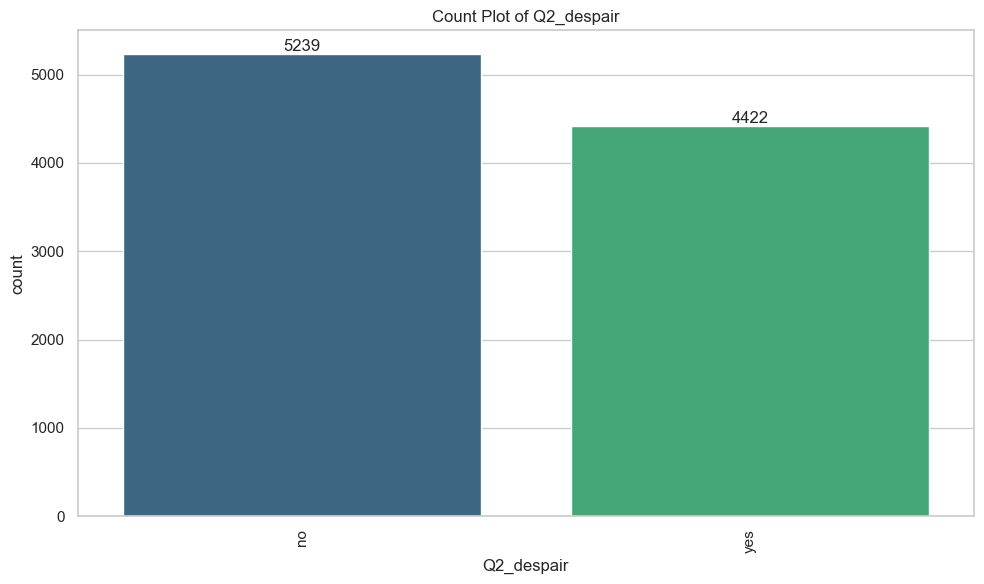

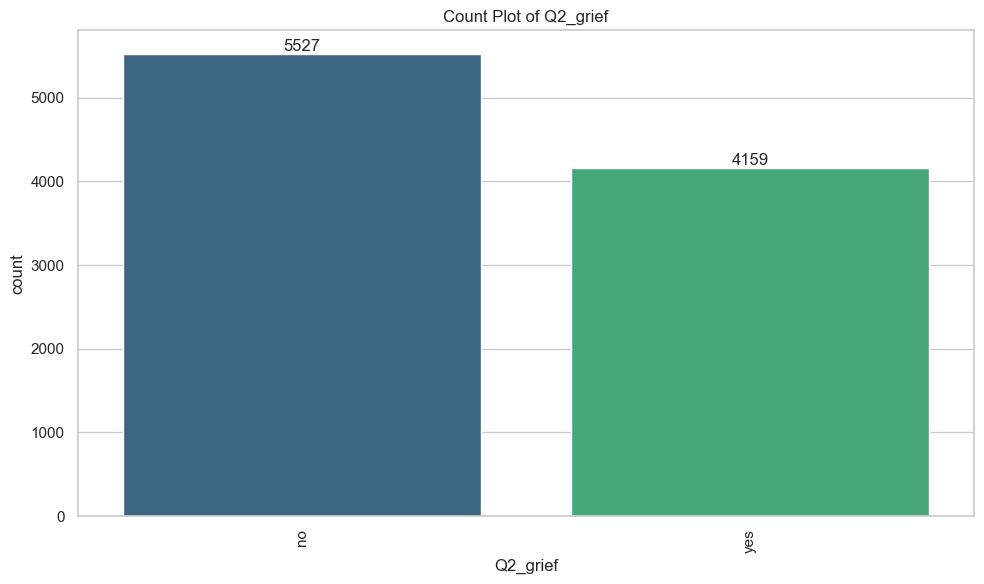

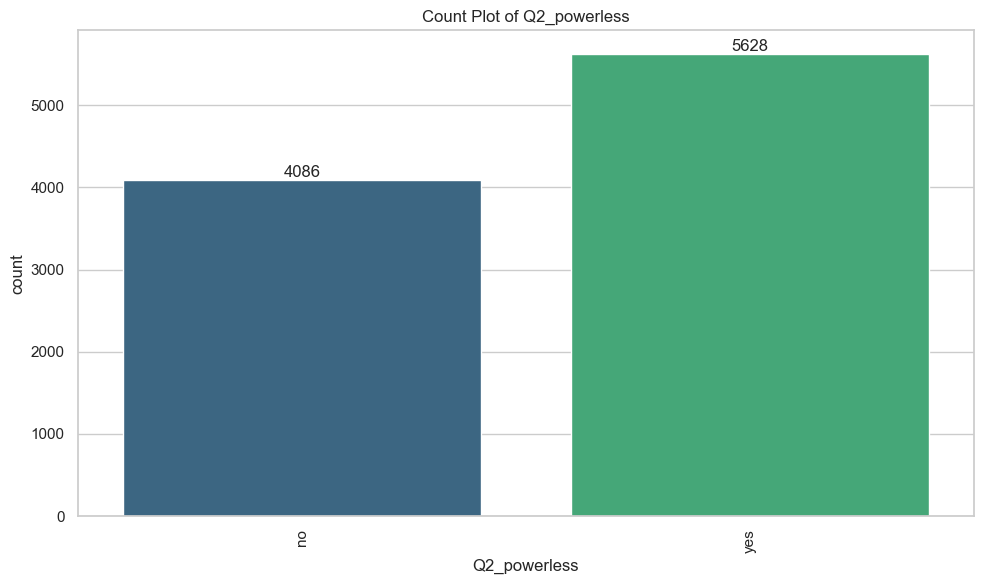

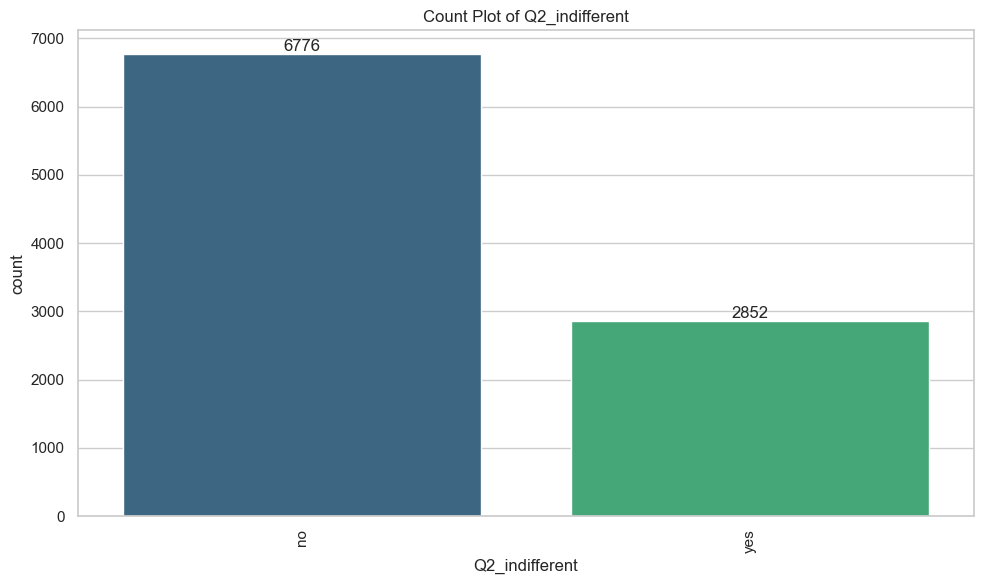

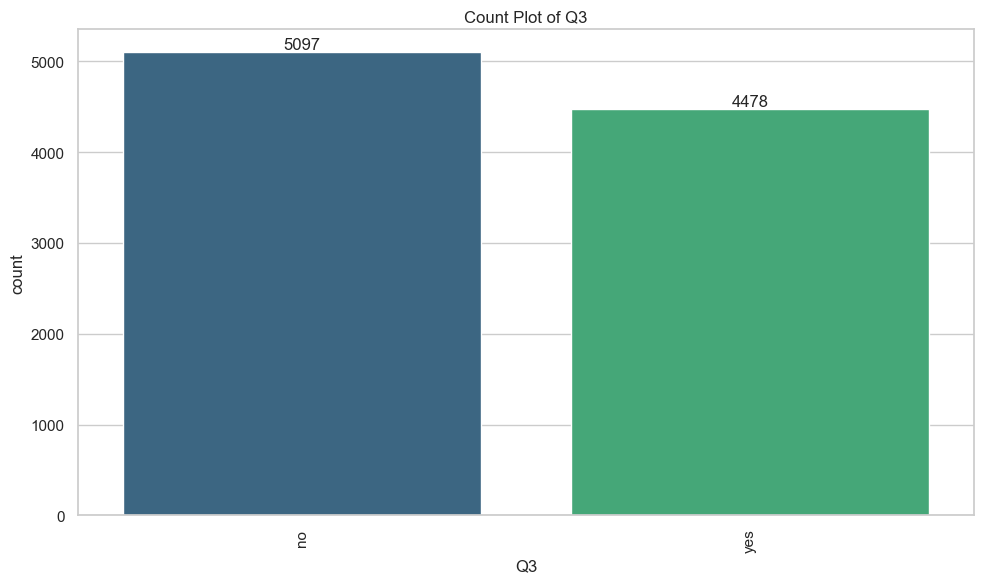

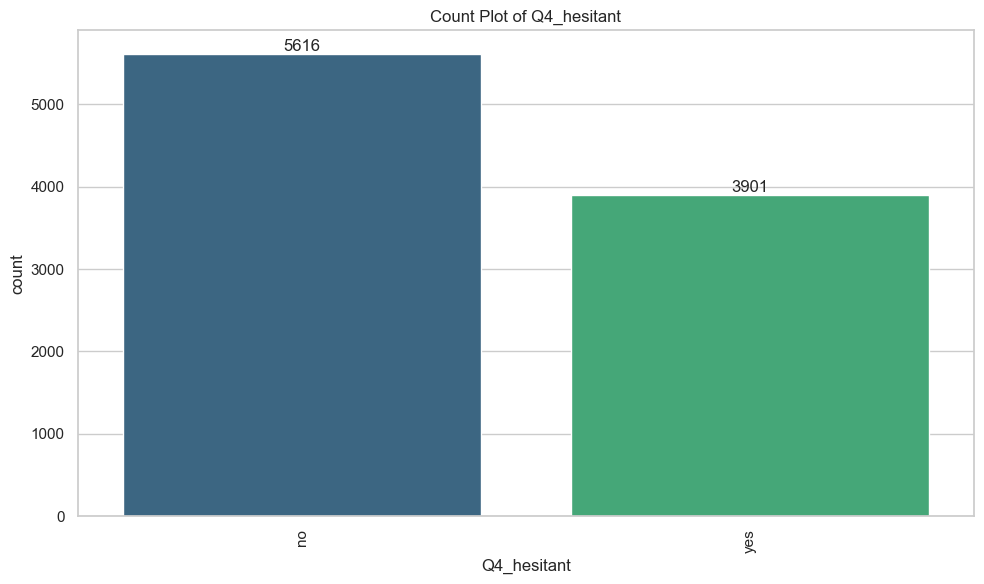

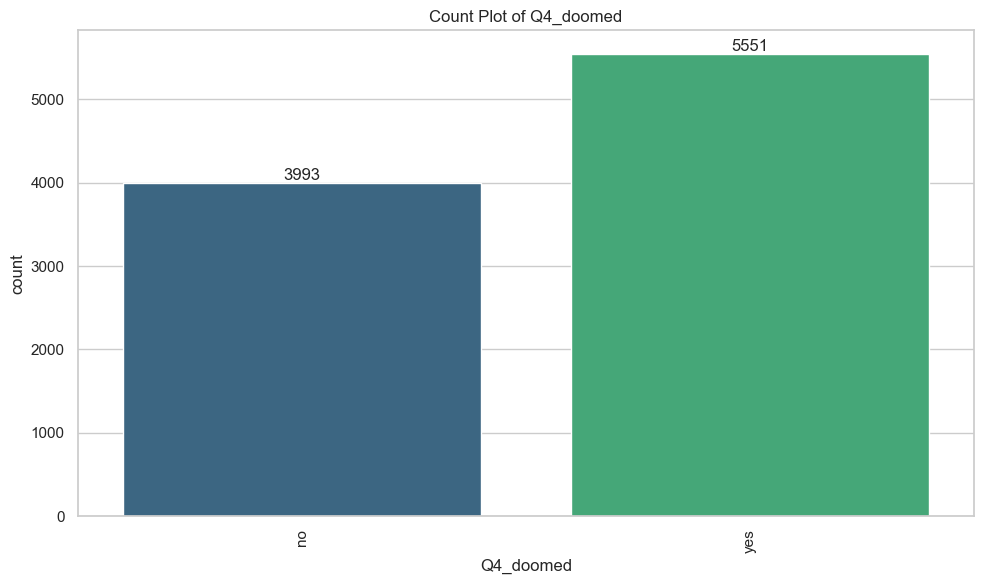

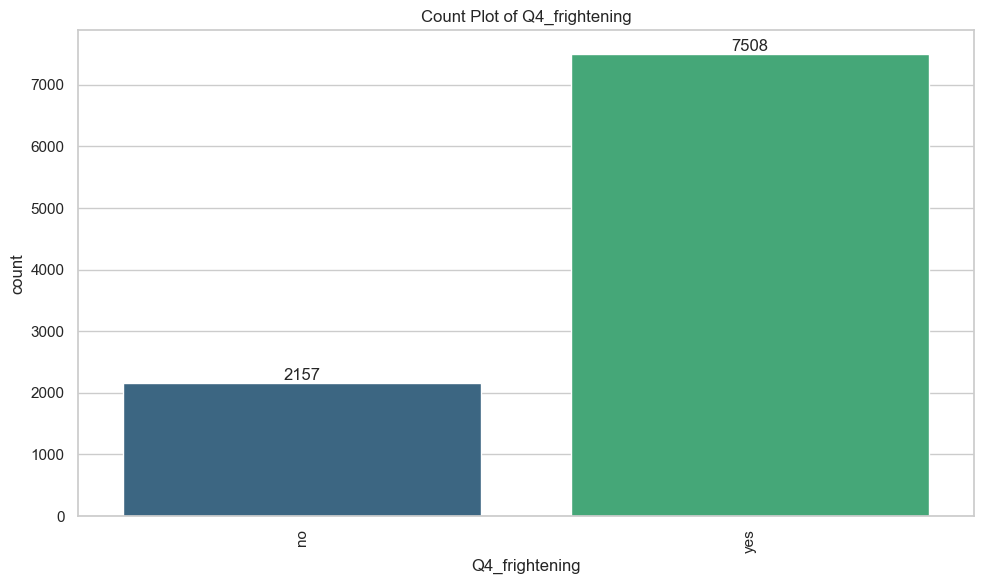

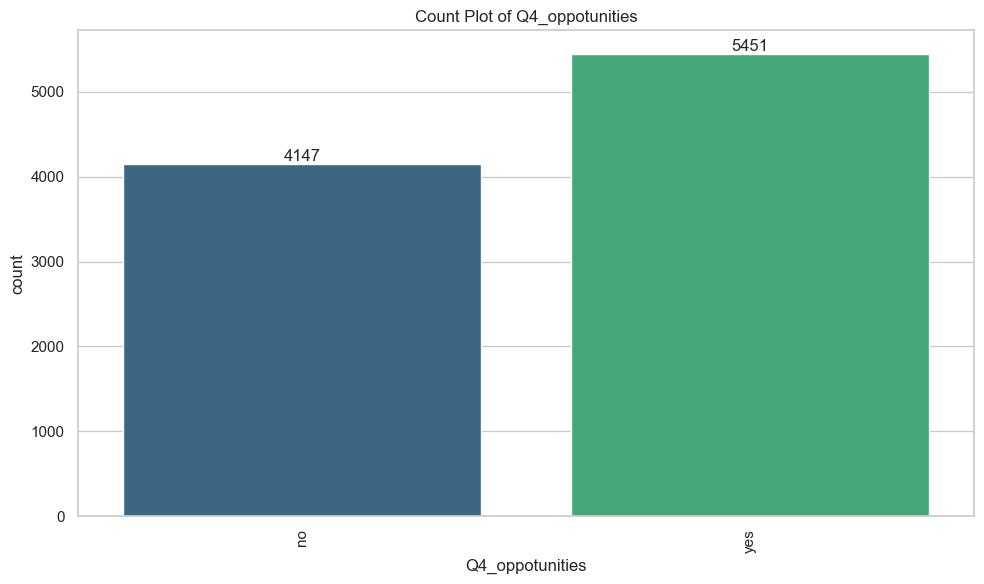

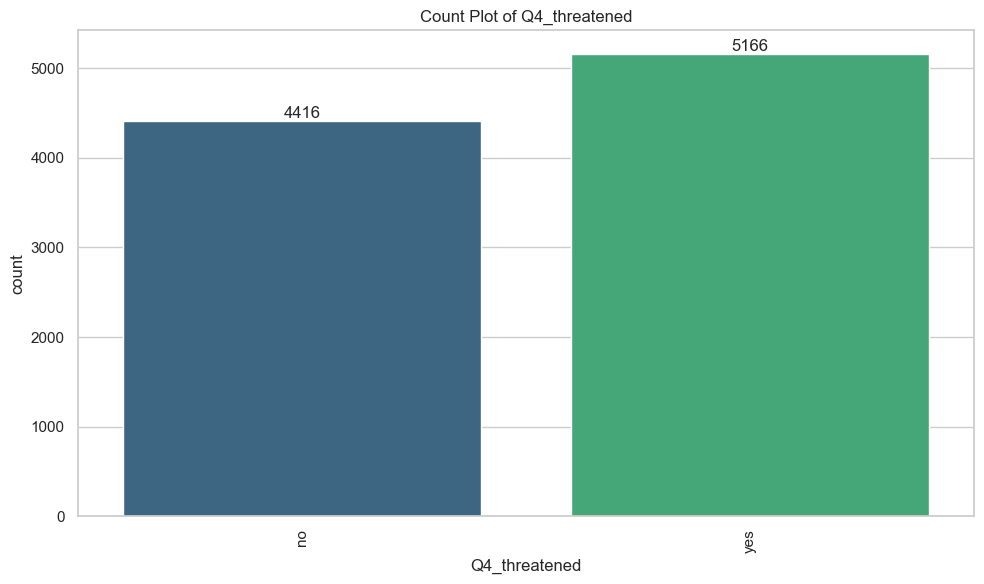

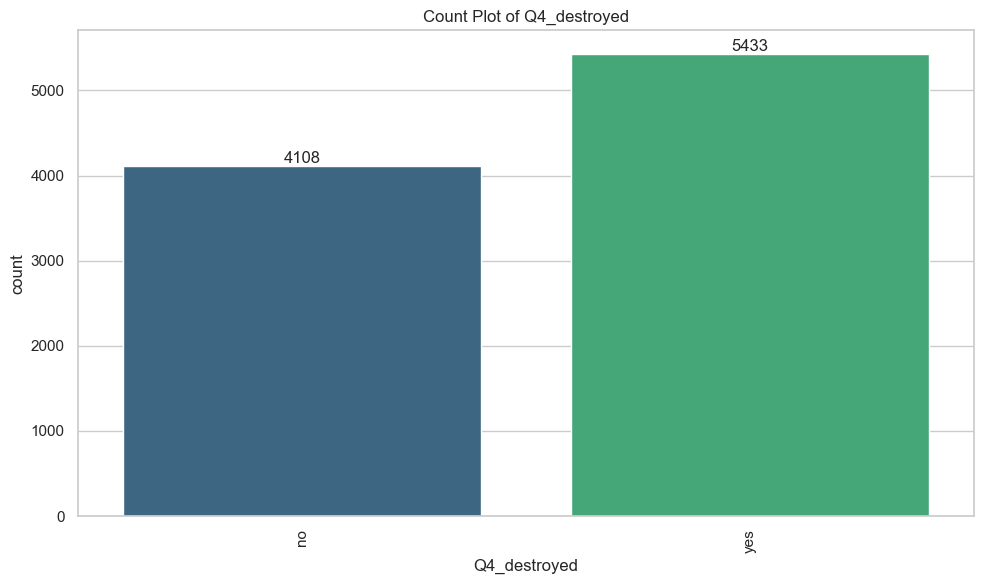

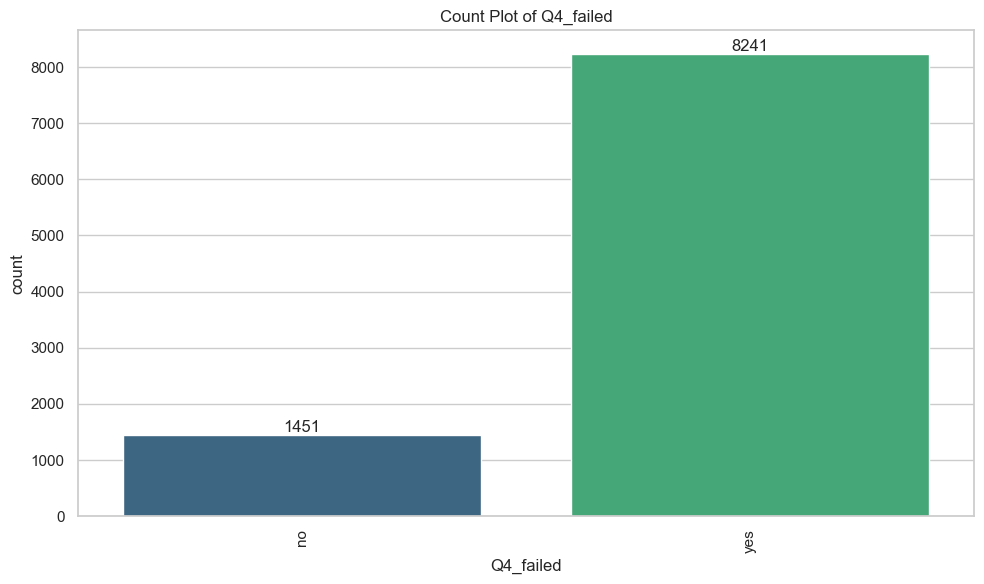

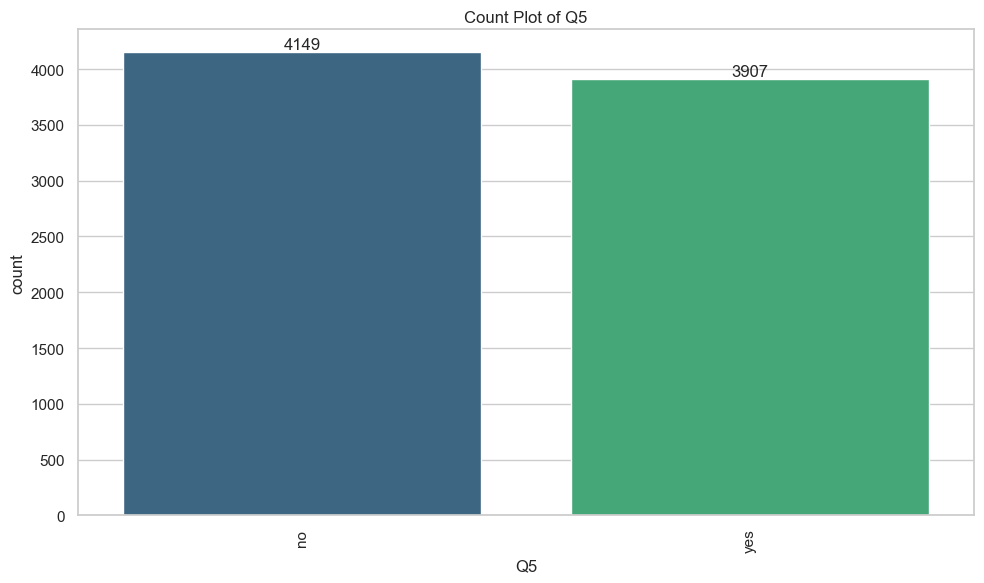

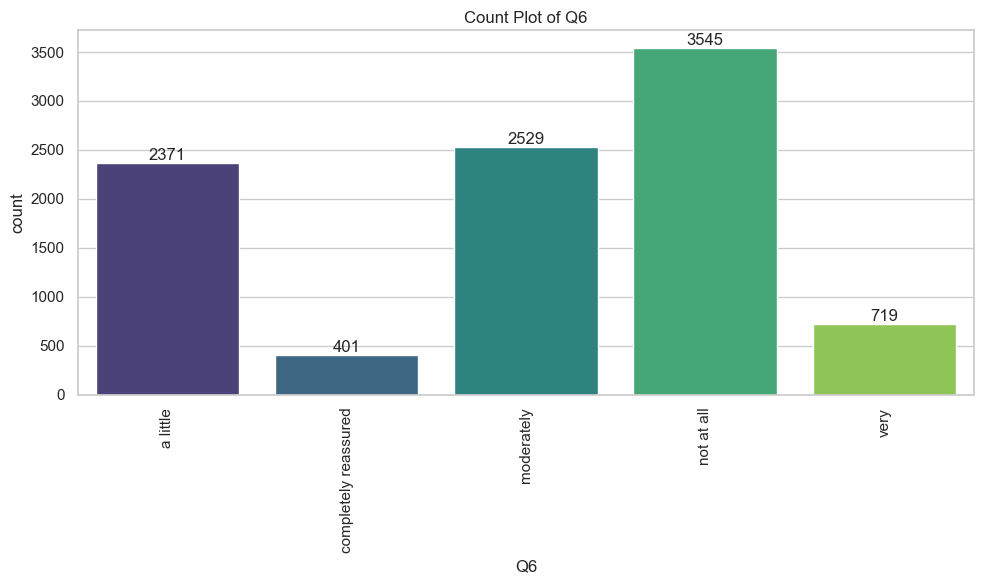

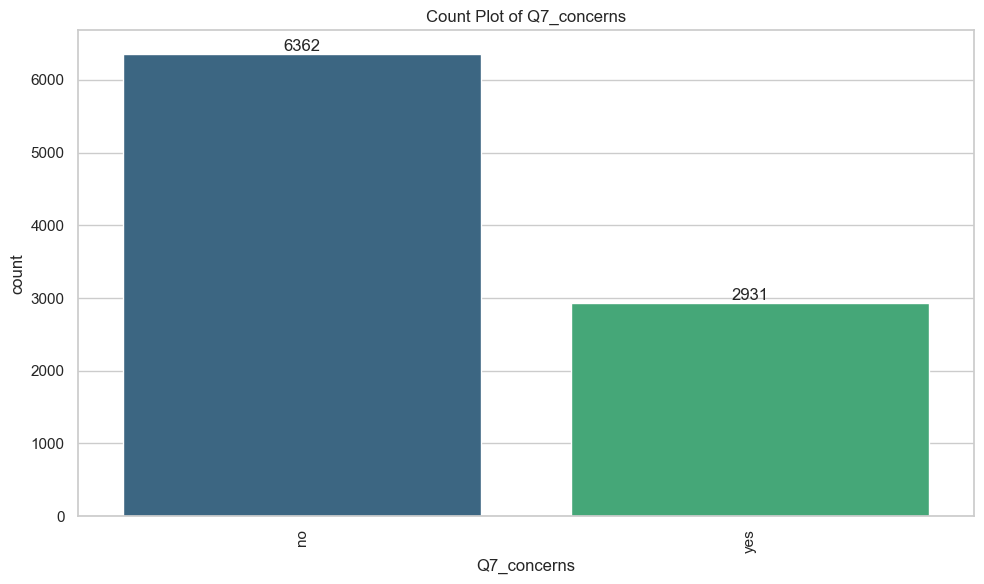

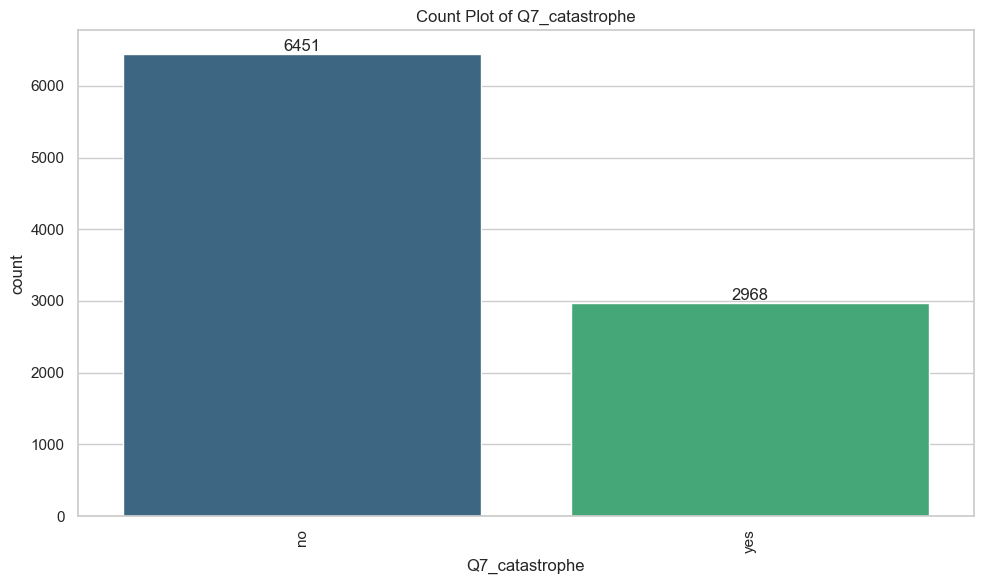

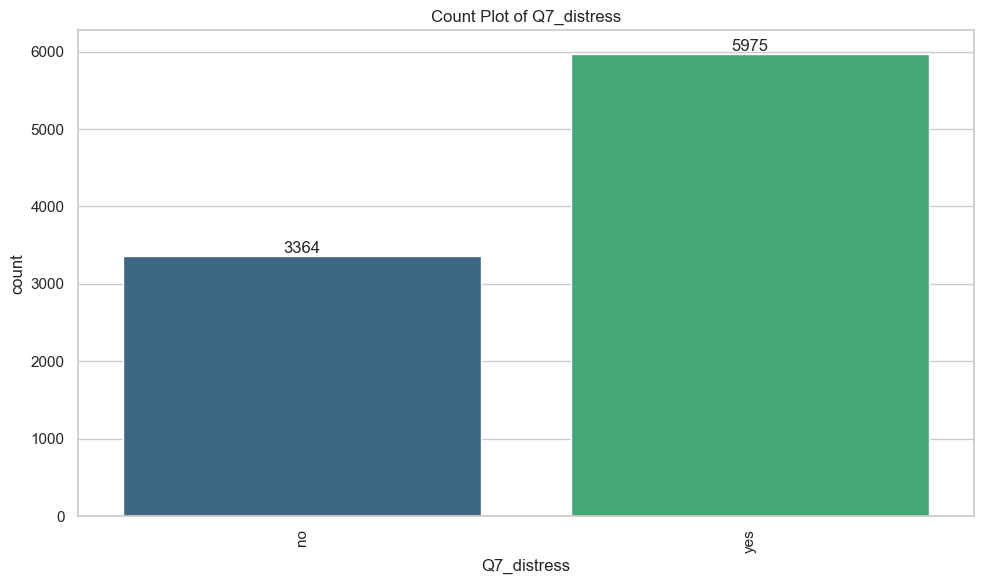

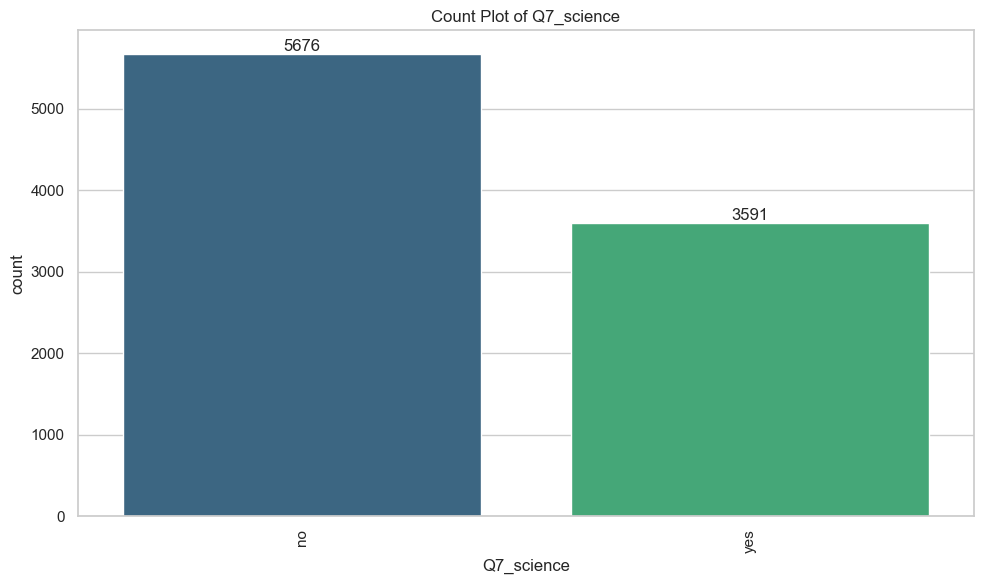

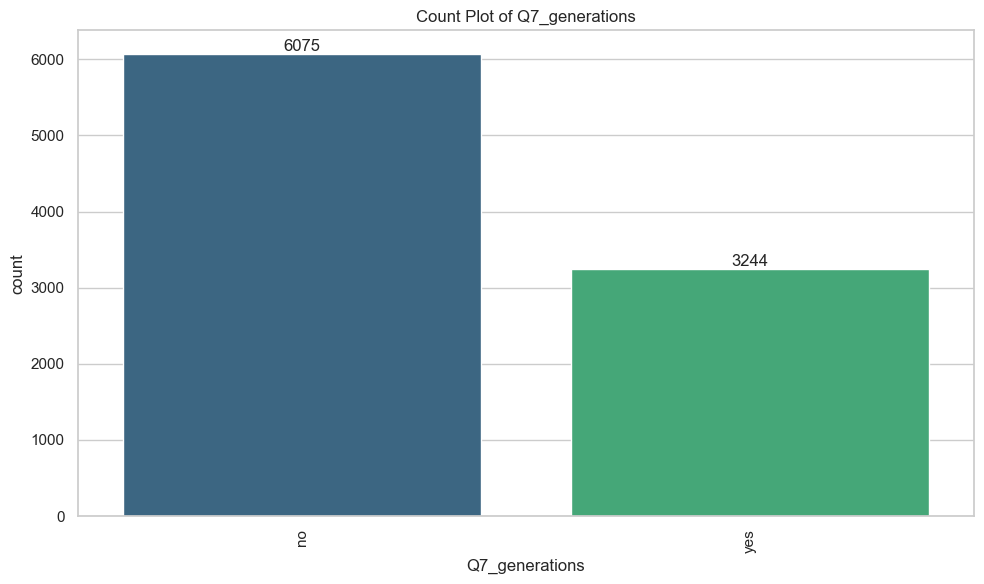

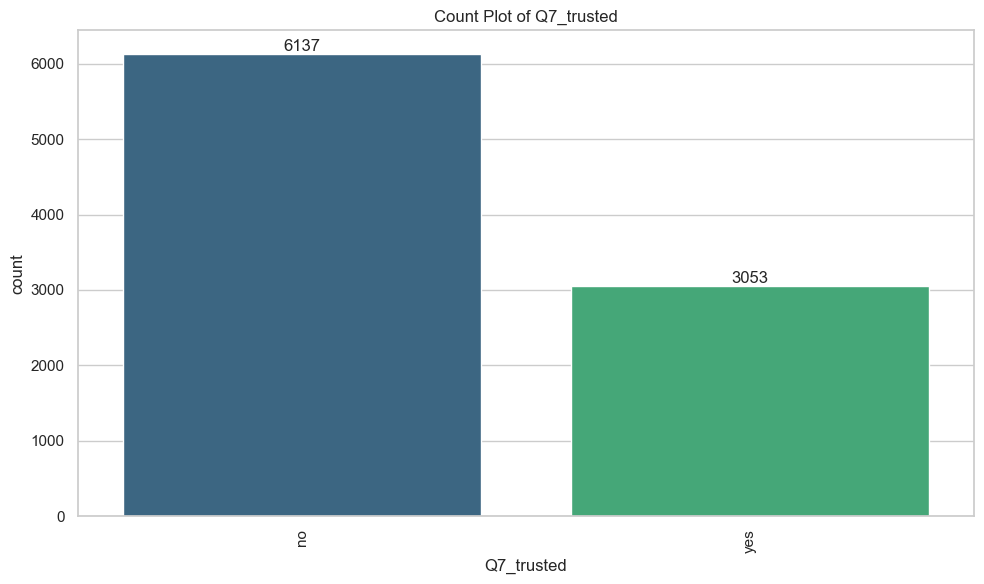

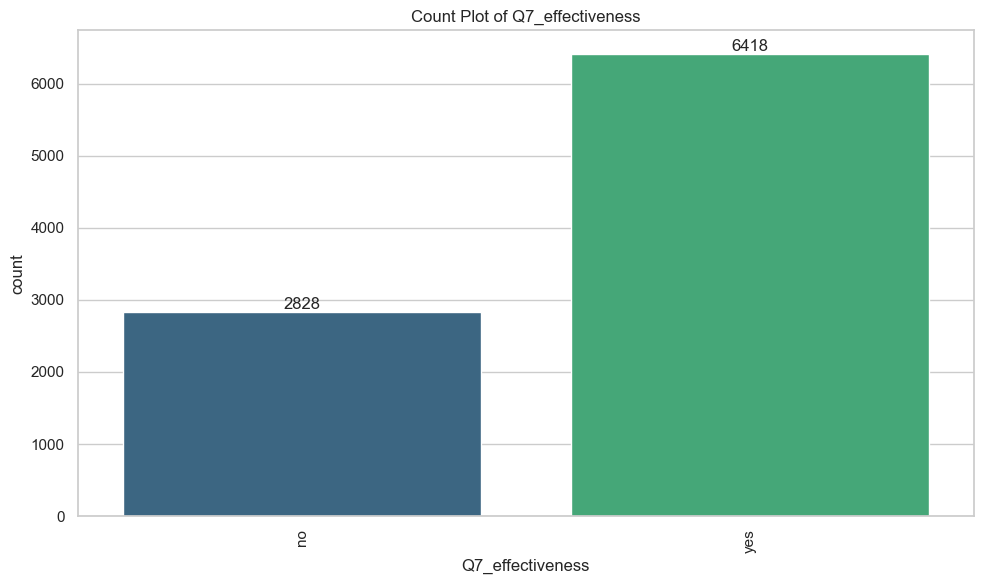

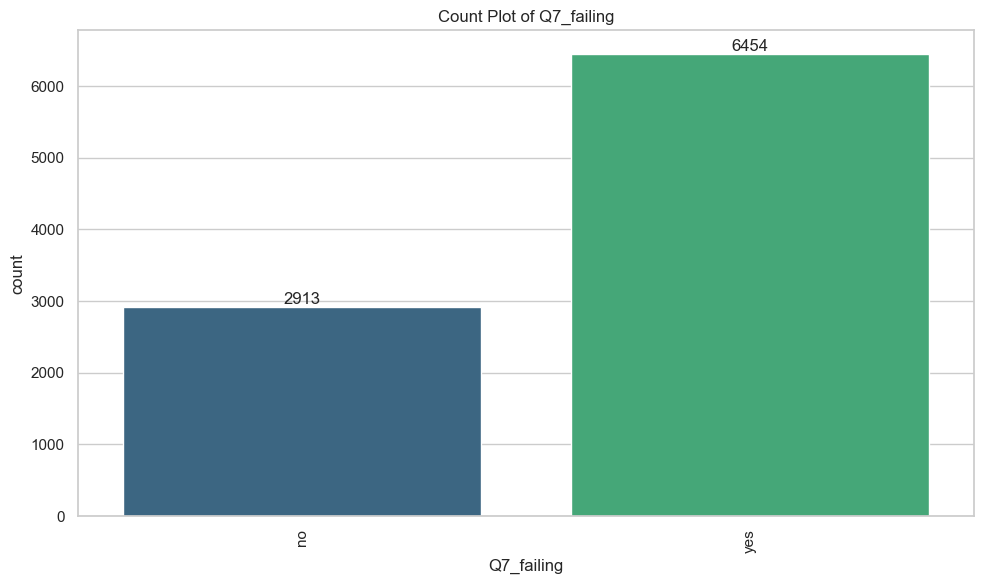

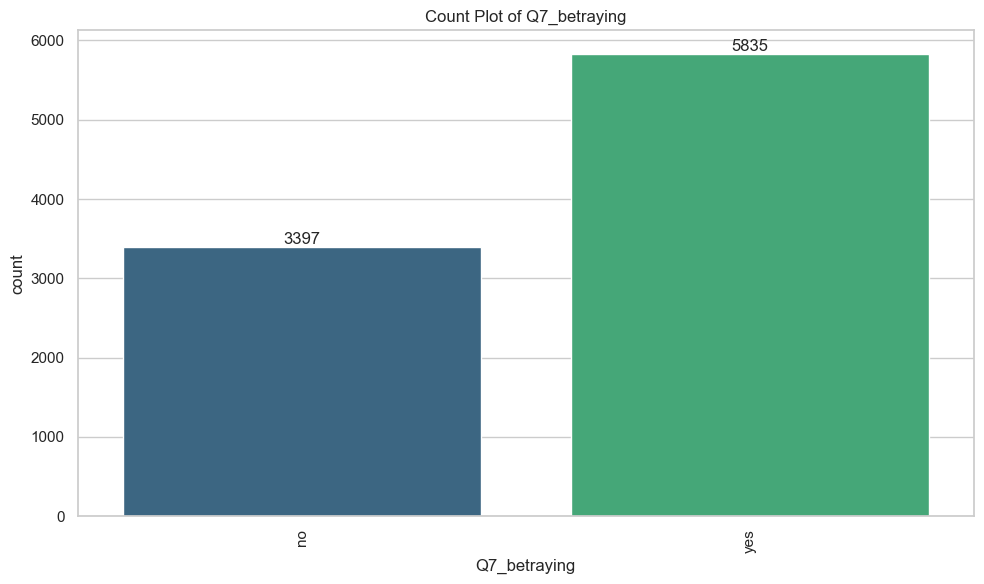

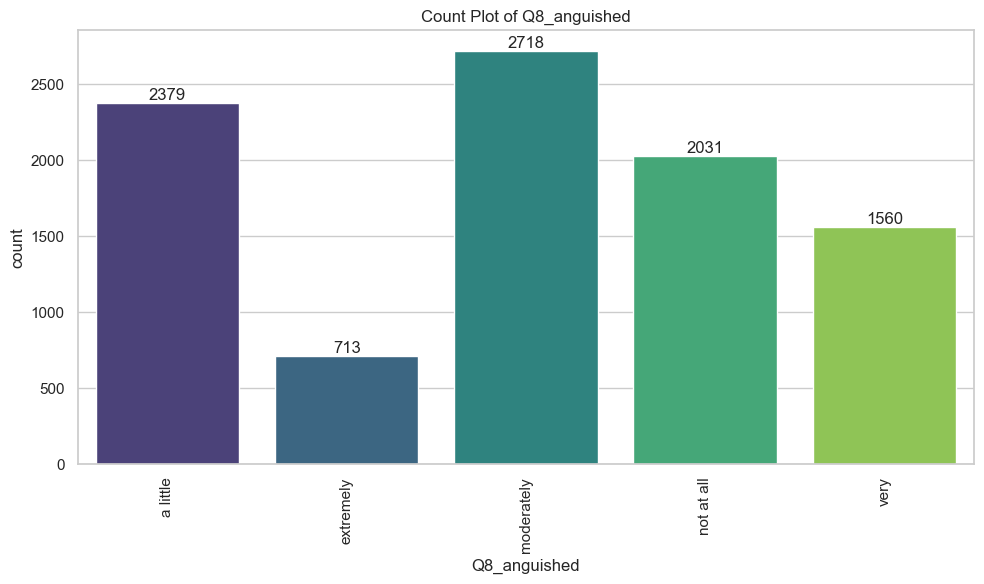

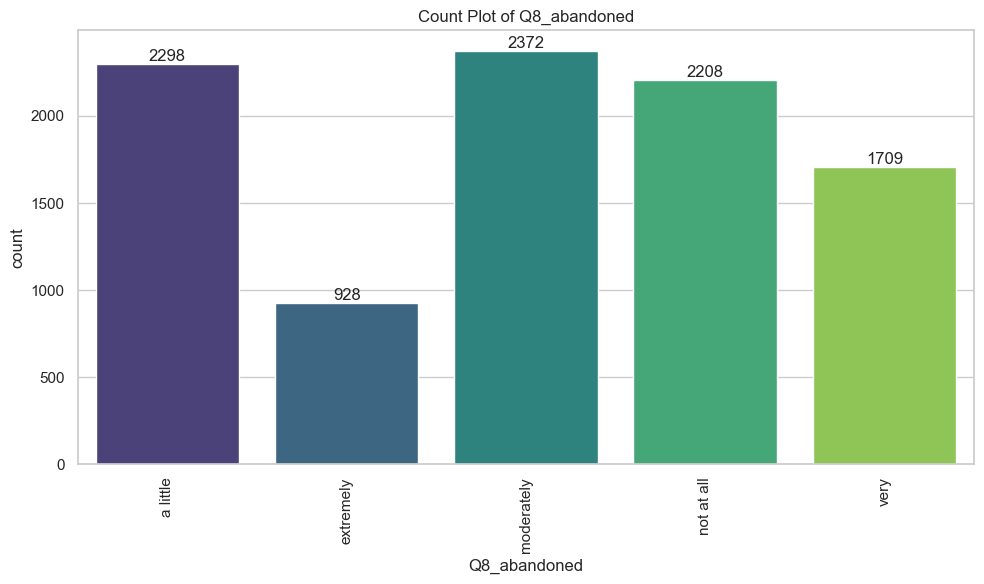

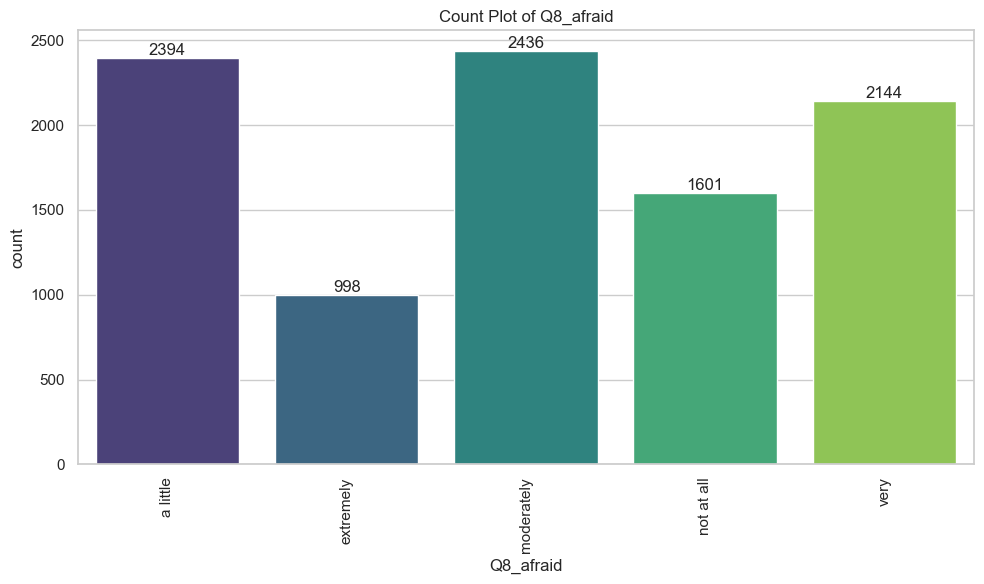

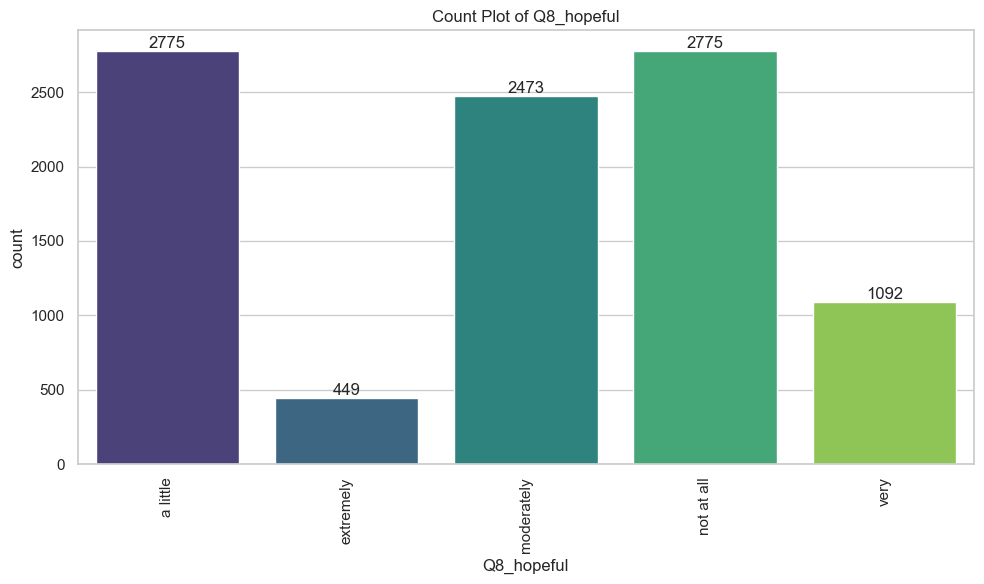

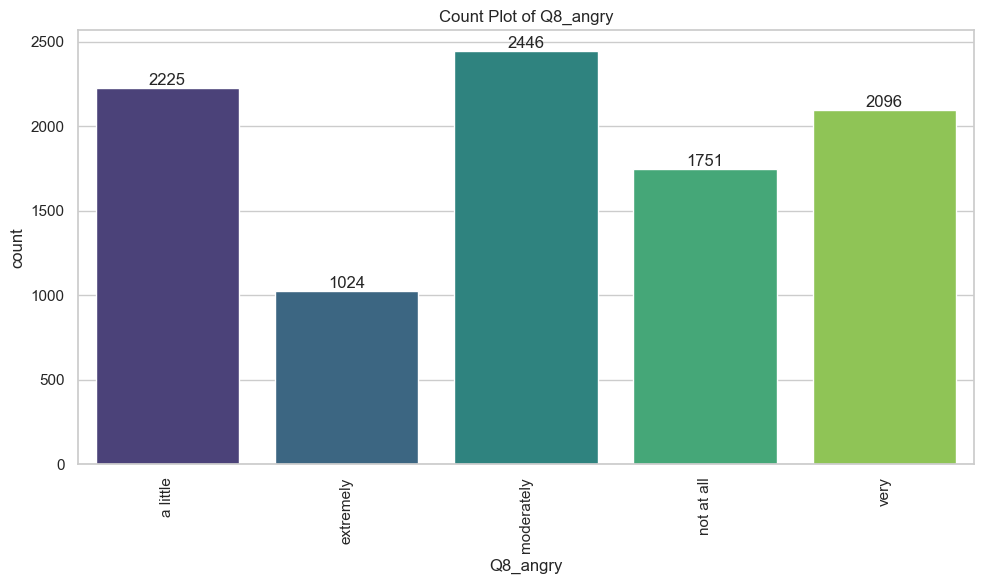

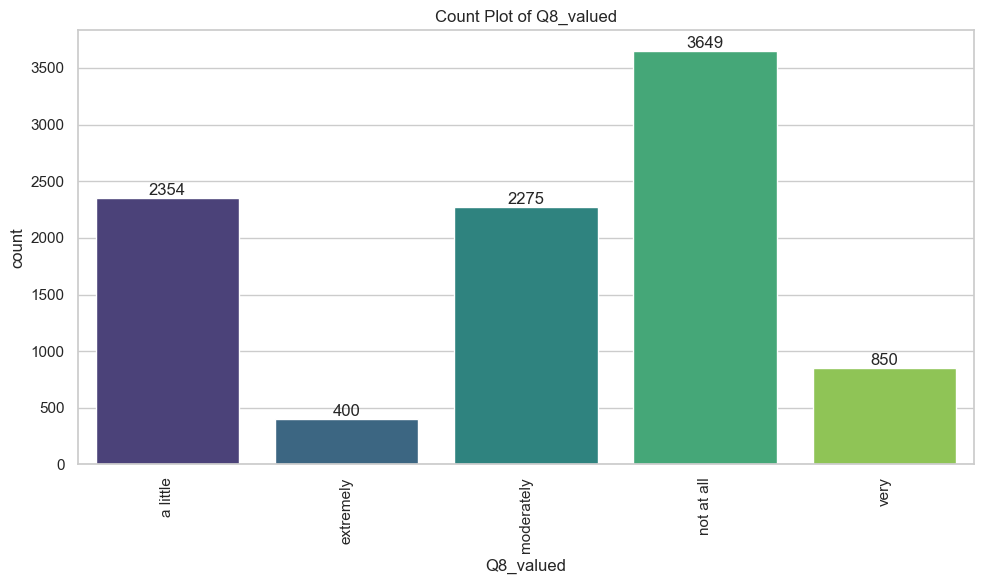

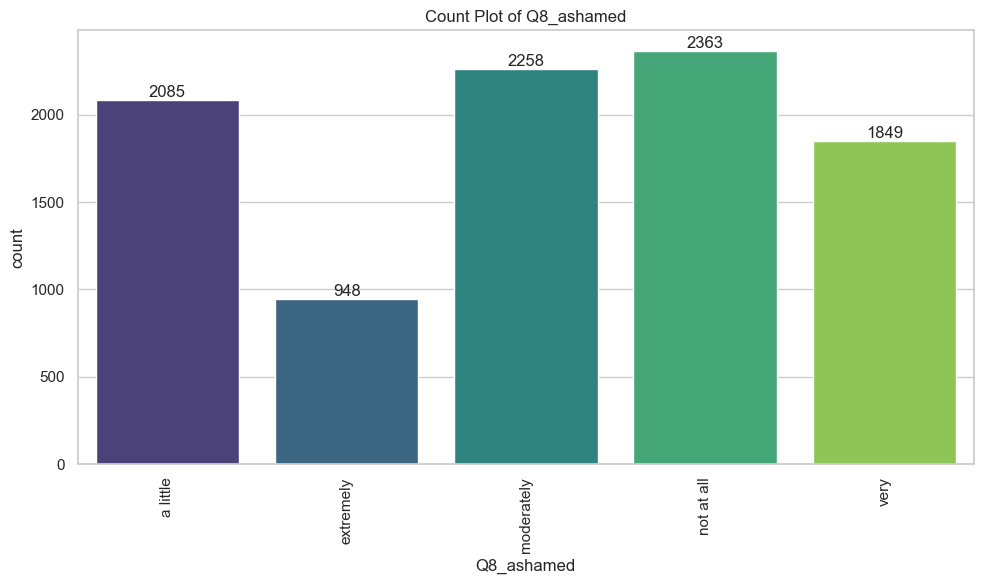

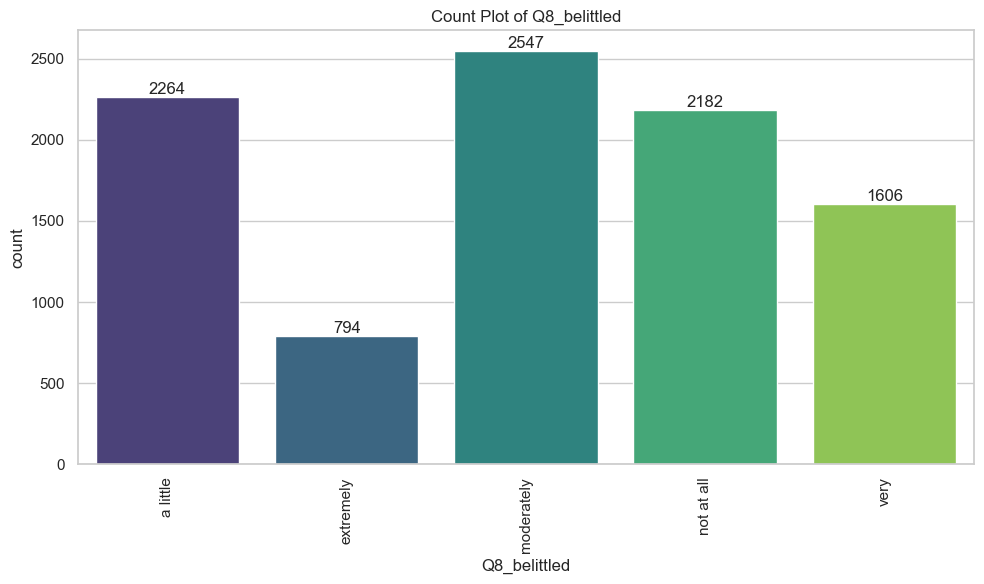

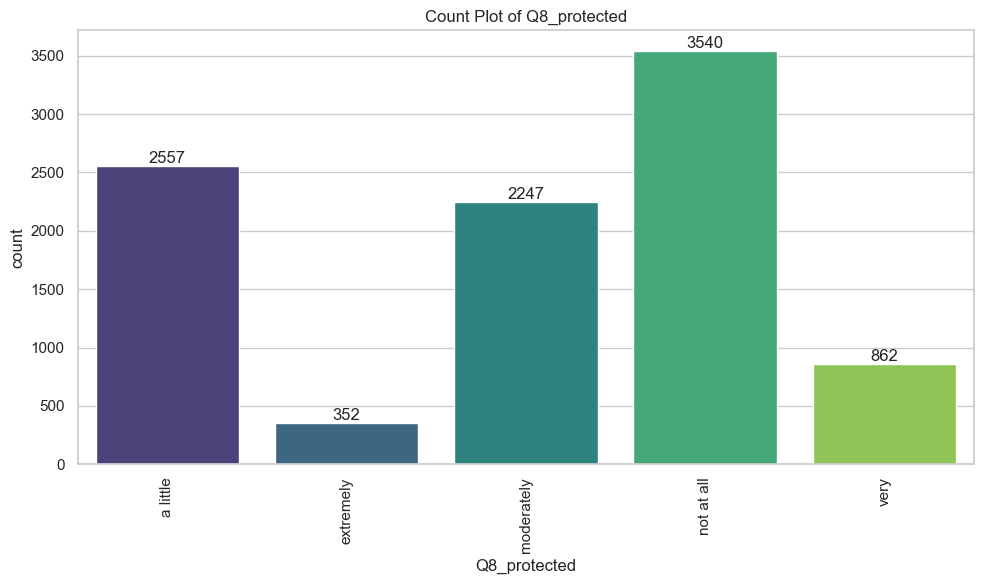

In [22]:
sns.set_theme(style='whitegrid')

for column in X.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df, hue=column, palette='viridis', legend=False)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot of {column}')

    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):  
            ax.text(
                x=p.get_x() + p.get_width() / 2,  
                y=height,  
                s=int(height),  
                ha='center', 
                va='bottom'   
            )
    
    plt.tight_layout() 
    plt.show()

In [23]:
# Correlations

correlations = X.corr()
q1_correlations = correlations['Q1']
print(q1_correlations.sort_values(ascending=True))

# Individually, none of the variables that we are using seem to have any practically significant correlations with Q1. 
# The variable with the Q1 correlation with the largest magnitude is Q2_afraid, with a correlaiton of .082.

Q3                 -0.052752
Q2_depressed       -0.043321
Q2_indifferent     -0.041624
Q7_generations     -0.033514
Q4_hesitant        -0.032059
Q8_anguished       -0.018706
Q7_catastrophe     -0.018640
Q8_valued          -0.018375
Q2_hurt            -0.018183
Q2_despair         -0.015164
Q7_concerns        -0.014277
Q2_grief           -0.013166
sex                -0.012853
Q4_destroyed       -0.012412
Q4_doomed          -0.011747
Q8_protected       -0.010024
Q2_optimistic      -0.009904
Q7_science         -0.009339
Q7_trusted         -0.007562
Q5                 -0.007550
Q7_effectiveness   -0.005059
Q4_threatened      -0.003759
Q8_belittled       -0.003128
Q8_angry           -0.002194
age                -0.000428
Q4_oppotunities     0.001681
Q8_abandoned        0.002115
Q7_failing          0.005178
Q7_betraying        0.005380
Q8_hopeful          0.009866
Q2_helpless         0.011044
Q8_ashamed          0.011289
Q7_distress         0.011815
Q8_afraid           0.019446
Q6            

## Data Analysis
Try data anaylsis with different models. Try with and without non-numeric columns (like language, country).

### Models without non-numeric columns:
#### Variables + Train and Test Split

In [1]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'Q1'])
y = df['Q1']

In [1]:
before = X['sex'].value_counts()

In [1]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,weight
0,6,0,1,1,1,1,1,1,1,1,...,2,4,4,3,1,3,2,-1,3,73
1,9,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,11
2,8,1,1,1,1,1,0,1,1,1,...,2,2,2,3,2,3,2,2,3,11
3,4,1,0,1,0,0,0,0,1,0,...,2,3,3,3,3,3,3,3,3,68
4,2,1,0,0,0,1,1,0,0,1,...,4,4,4,1,4,1,4,1,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,0,1,1,1,...,4,0,1,0,1,0,1,0,3,29
9996,9,1,1,1,1,1,0,1,0,1,...,0,4,2,0,2,3,0,3,0,38
9997,3,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,64
9998,5,1,1,1,1,1,0,1,1,1,...,0,0,4,2,2,0,4,2,0,56


In [1]:
after = X['sex'].value_counts()
before.values == after.values

array([ True,  True])

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model 1: Oridnal/Nominal Logistic Regression

#### Model 2: Random Forest

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [212]:
y_pred_RF = rf.predict(X_test)
accuracy_score(y_test, y_pred_RF)

0.4505327245053272

In [213]:
cm = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

ValueError: could not convert string to float: 'extremely'

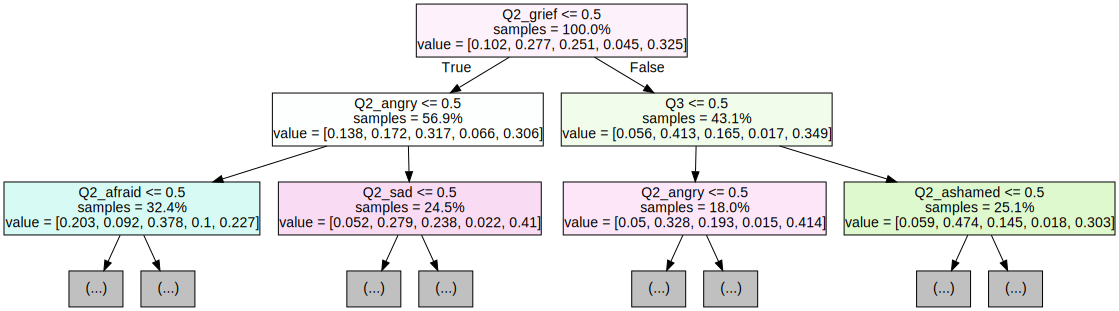

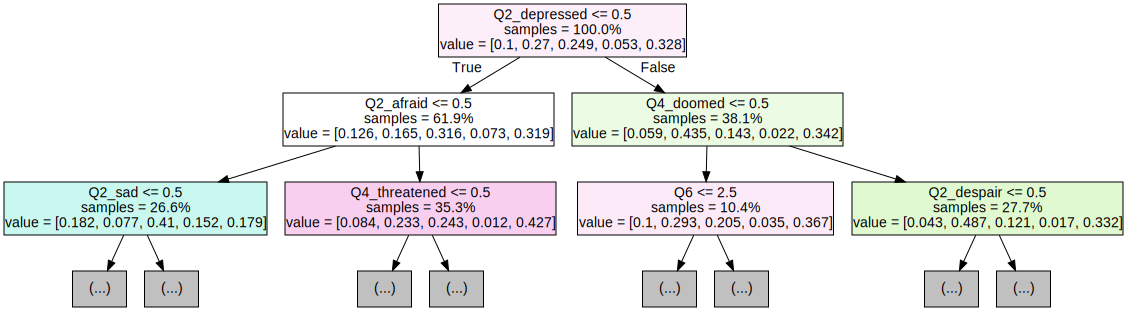

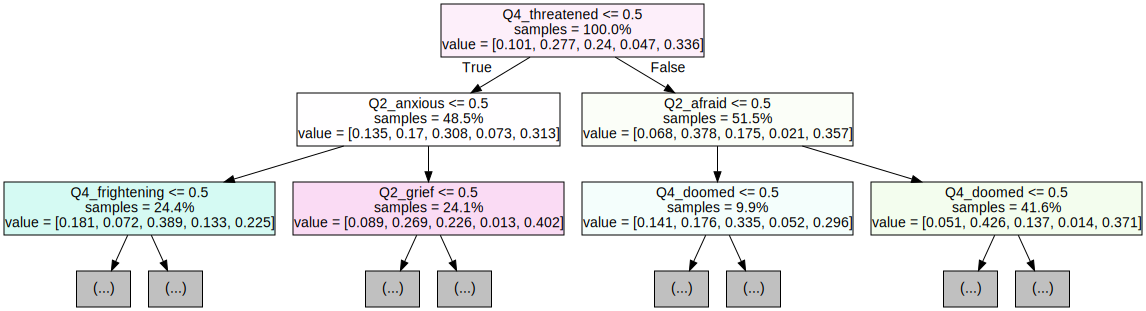

In [33]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [90]:
print(y_train)

5273      extremely
1773           very
5491    not worried
1477           very
102       extremely
           ...     
5804    not worried
5249           very
5452           very
874      moderately
7363       a little
Name: Q1, Length: 7881, dtype: category
Categories (5, object): ['a little', 'extremely', 'moderately', 'not worried', 'very']


#### Model 4: Neural Network